# Logistic Regression - Defaulters Dataset

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("banking.csv")
print("Rows,Columns:",df.shape)


Rows,Columns: (41188, 21)


In [3]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [5]:
df = df[["y","age","job","education","default","marital","loan","poutcome"]]
df

,y,age,job,education,default,marital,loan,poutcome
0,0,44,blue-collar,basic.4y,unknown,married,no,nonexistent
1,0,53,technician,unknown,no,married,no,nonexistent
2,1,28,management,university.degree,no,single,no,success
3,0,39,services,high.school,no,married,no,nonexistent
4,1,55,retired,basic.4y,no,married,no,success
5,0,30,management,basic.4y,no,divorced,no,nonexistent
6,0,37,blue-collar,basic.4y,no,married,no,nonexistent
7,0,39,blue-collar,basic.9y,no,divorced,no,nonexistent
8,1,36,admin.,university.degree,no,married,no,success
9,0,27,blue-collar,basic.4y,no,single,no,failure


# Data Visualization

It is always good practice to visualize your data to understand the data in order to fit the model using the best predictors. 

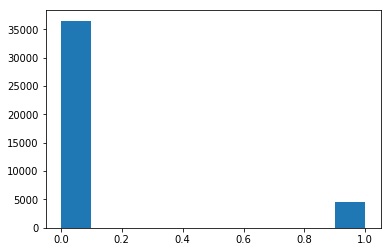

In [6]:
plt.hist(df["y"])
plt.show()

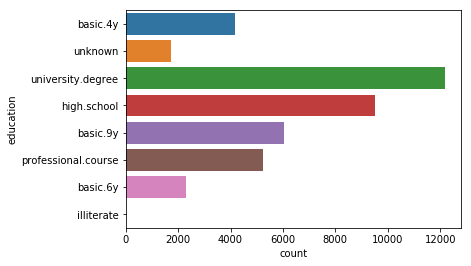

In [7]:
sb.countplot(y="education",data = df)
plt.show()

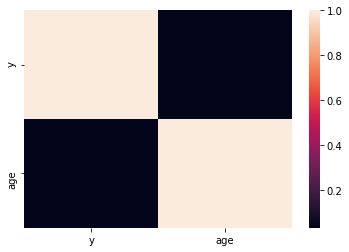

In [8]:
sb.heatmap(df.corr())
plt.show()

# Data Selection 

In [9]:
y = df[["y"]]
x = df.drop(["y"], axis = 1)

In [10]:

data = pd.get_dummies(x, columns =['job', 'marital', 'default',"education", 'loan', 'poutcome'])

In [11]:
data = data.drop(["loan_unknown","job_unknown","marital_unknown","education_unknown","default_unknown"], axis = 1)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size = 0.3)

# Model Fitting

In [13]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train) # try solver= sgd,multi_class =  ovo

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(x_test)

# Remember: Logistic Regression predicts probability of class, not actual class
y_pred_prob = classifier.predict_proba(x_test)


In [15]:
print(y_pred_prob[:5])

[[0.89371755 0.10628245]
 [0.933111   0.066889  ]
 [0.39573495 0.60426505]
 [0.88041964 0.11958036]
 [0.96715124 0.03284876]]


In [16]:
print(y_pred[:5])

[0 0 1 0 0]


# Confusion Matrix

A confusion matrix is an effective method to measure the accuracy of a classification problem. Below the upper left corner number to True Negatives (no. of non-defaulters correctly predicted), the upper right number refers to False Negative (predicted non-default but actuall default), the lower left corner is False Positive (predicted default, actualy non-default) and the lower right corner is True Positive (predicted default, actually default)

In [17]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_test,y_pred)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

[[10843   136]
 [ 1109   269]]

TN = 10843
FN = 136
FP = 1109
TP = 269


In [18]:
#overall accuracy
accuracy = (confuse[0][0] + confuse[1][1])/ len(y_test)
print("accuracy of classifier is:",accuracy)
#precision is a measure of positive predictions negative or ratio of tp/overal p
precision =  confuse[1][1]/(confuse[1][1]+confuse[0][1])
print("precision:",precision)
#recall is proportion all true positive samples.
recall = confuse[1][1]/(confuse[1][1]+confuse[1][0])
print("recall:",recall)

accuracy of classifier is: 0.8992473901432386
precision: 0.6641975308641975
recall: 0.19521044992743106


# Precision vs. Recall
In simple terms, high precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10979
          1       0.66      0.20      0.30      1378

avg / total       0.88      0.90      0.87     12357



## AUC-ROC Curve

In [20]:
import sys
!{sys.executable} -m pip install scikit-plot

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


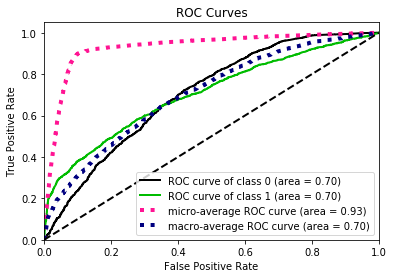

In [21]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_roc_curve(y_test, y_pred_prob)
plt.show()

